In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import pathlib as path
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.ticker as mtick
import os

In [2]:
plot_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Plots"
data_output_dir = "C:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Output Data"

import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'c:\\Users\\Advait Lath\\Documents\\nimf-tracker-main\\Bloomberg\\Financial': ['.ipynb_checkpoints', '10ygsec.png', '12m_tbill.png', '3bbb_yield.csv', 'call_rate.csv', 'gsec_tenyr.csv', 'new.ipynb', 'tbill_oneyr.csv', 'tbill_oneyr.xlsx', 'usdinr.csv', 'usdinr.png', 'vix.csv', 'VIX.png', 'wti.csv']


In [7]:
local_path = os.getcwd()+"\\"

In [3]:
bl_path = "D:\\Downloads\\Vibhav tracker updates\\Bloomberg 10 Year Govt Bond TR Index.xlsx"

directory = "D:\\Downloads\\Vibhav tracker updates"
files = os.listdir(directory)  # Get all the files in that directory
print("Files in %r: %s" % (directory, files))


Files in 'D:\\Downloads\\Vibhav tracker updates': ['Bloomberg 10 Year Govt Bond TR Index (13).xlsx', 'Bloomberg 10 Year Govt Bond TR Index (2).xlsx', 'Bloomberg 10 Year Govt Bond TR Index (New) (1).xlsx', 'Bloomberg 10 Year Govt Bond TR Index.xlsx', 'Economic indicators 1.xlsx', 'Economic Indicators 15 apr.xlsx', 'Economic indicators 2 apr.xlsx', 'Economic indicators 24 Apr.xlsx', 'Economic indicators 28 March.xlsx', 'Economic indicators 30 April.xlsx', 'Economic indicators 7 may.xlsx', 'input-data (2).xlsx', 'input-data.xlsx', 'NIMF Tracker-13 Mar 2022.pdf', 'NIMF Tracker-27 Mar 2022.pdf', 'notes tracker.docx', 'tracker 27 march vibhav 1.indd', 'tracker 27 march vibhav.indd', 'tracker.indd']


In [4]:
def concatter(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[:last_date_in_local][:-1], local_df])
    return final_df

In [5]:
def concatter2(file_name, col1, col2, rename_from, rename_to):
    local_df = pd.read_csv(local_path+file_name, index_col=0, parse_dates=True)
    local_df.dropna(inplace=True)
    last_date_in_local = local_df.index[0].to_pydatetime().strftime("%Y-%m-%d")

    bl_df = pd.read_excel(bl_path, sheet_name="Worksheet", usecols=[col1, col2], skiprows=7, index_col=0, parse_dates=True)
    bl_df.dropna(inplace=True)
    bl_df.index.rename("Date", inplace=True)
    bl_df.rename(columns={rename_from: rename_to}, inplace=True)

    final_df = pd.concat([bl_df[last_date_in_local:][:-1], local_df])
    return final_df

# 3ybbb

In [8]:
bbb = concatter2(file_name = "3bbb_yield.csv", col1=9, col2=10, rename_from="PX_LAST.3", rename_to="3BBB")
#Bloomberg 10 Year Govt Bond TR Index (13)

C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17124\979223966.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


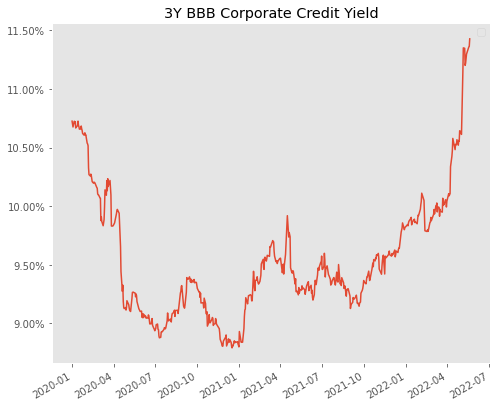

In [9]:
ax = bbb.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('3Y BBB Corporate Credit Yield')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\3ybbb.png', dpi=150, bbox_inches='tight')

In [10]:
bbb.to_csv(data_output_dir+"\\3bbb_yield.csv")
bbb.to_csv("3bbb_yield.csv")

In [11]:
bbb.round(2)

,3BBB
Date,
2022-05-20,11.43
2022-05-19,11.36
2022-05-18,11.36
2022-05-13,11.30
2022-05-12,11.26
...,...
2020-01-07,10.71
2020-01-06,10.72
2020-01-03,10.68


# call

In [12]:
call = concatter2(file_name = "call_rate.csv", col1=3, col2=4, rename_from="PX_LAST.1", rename_to="call rate")

In [13]:
call.round(2)

,call rate
Date,
2022-05-20,4.14
2022-05-19,4.00
2022-05-18,4.04
2022-05-17,4.05
2022-05-13,4.08
...,...
2019-01-07,6.36
2019-01-04,6.35
2019-01-03,6.34


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17124\3485413063.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


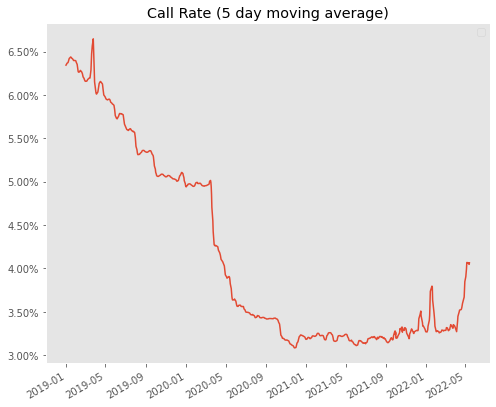

In [14]:
ax = call.rolling(5).mean().plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Call Rate (5 day moving average)')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\call.png', dpi=300, bbox_inches='tight')

In [15]:
call.to_csv(data_output_dir+"\\call_rate.csv")
call.to_csv("call_rate.csv")

In [16]:
call[::-1].rolling(5).mean().round(2)

,call rate
Date,
2019-01-01,NaN
2019-01-02,NaN
2019-01-03,NaN
2019-01-04,NaN
2019-01-07,6.34
...,...
2022-05-13,4.06
2022-05-17,4.06
2022-05-18,4.05


# gsec

In [17]:
ten_yr = concatter2(file_name = "gsec_tenyr.csv", col1=6, col2=7, rename_from="PX_LAST.2", rename_to="10Y")

In [18]:
ten_yr.round(2)

,10Y
Date,
2022-05-20,7.36
2022-05-19,7.32
2022-05-18,7.35
2022-05-17,7.37
2022-05-13,7.32
...,...
2020-01-07,6.55
2020-01-06,6.57
2020-01-03,6.52


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17124\2694075316.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


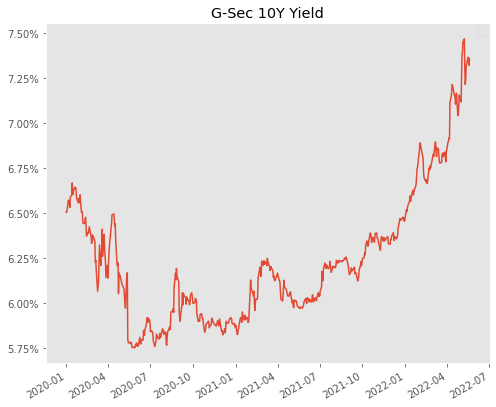

In [19]:
ax=ten_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('G-Sec 10Y Yield')
plt.grid(b=False)
plt.tight_layout()
plt.legend("")
plt.xlabel("")
plt.savefig(plot_output_dir+'\\10ygsec.png', dpi=300, bbox_inches='tight')


In [20]:
ten_yr

,10Y
Date,
2022-05-20,7.359
2022-05-19,7.321
2022-05-18,7.353
2022-05-17,7.366
2022-05-13,7.318
...,...
2020-01-07,6.554
2020-01-06,6.571
2020-01-03,6.515


In [21]:
ten_yr.to_csv(data_output_dir+"\\gsec_tenyr.csv")
ten_yr.to_csv("gsec_tenyr.csv")

# 1 yr t bill - somehow there is a parsing issue, do this manually

In [36]:
# new = pd.read_csv("/Users/vibhav/Desktop/tbill_oneyr 2.csv", index_col=0, parse_dates=True, dayfirst=True)

In [31]:
# new

In [32]:
# new.plot()

In [33]:
# new

In [22]:
one_yr = concatter2(file_name = "tbill_oneyr.csv", col1=18, col2=19, rename_from="PX_LAST.6", rename_to="12M")

In [35]:
# one_yr = pd.read_excel("/Users/vibhav/Google Drive/NIMF/NIMF/Tracker/Untitled Folder/2020-06-24/New/Copy/tbill_oneyr.xlsx", index_col=0, parse_dates=True)

In [36]:
# one_yr.index = pd.to_datetime(one_yr.index, format="%Y-%m-%d", dayfirst=True)

In [37]:
# one_yr = new

In [23]:
one_yr.head(10)

,12M
Date,
2022-05-20,5.89
2022-05-19,5.87
2022-05-18,5.90
2022-05-17,5.80
2022-05-13,5.84
2022-05-12,5.86
2022-05-11,5.83
2022-05-10,5.53
2022-05-09,5.43


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17124\1092937734.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


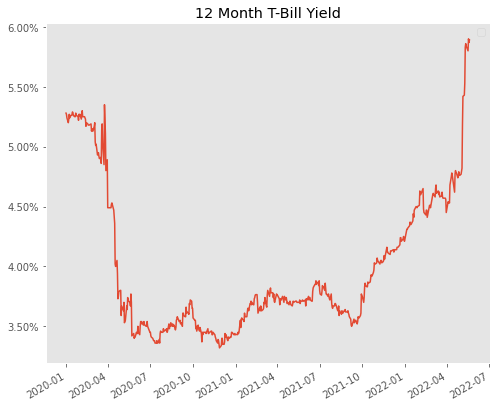

In [24]:
ax = one_yr.plot(figsize=(7,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title('12 Month T-Bill Yield')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\12m_tbill.png', dpi=300, bbox_inches='tight')

In [26]:

one_yr.to_csv(data_output_dir+"\\tbill_oneyr.csv")
one_yr.to_csv("tbill_oneyr.csv")


# vix

In [27]:
vix = concatter2(file_name="vix.csv", col1=21, col2=22, rename_from="PX_LAST.7", rename_to="VIX")

C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17124\1759729172.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


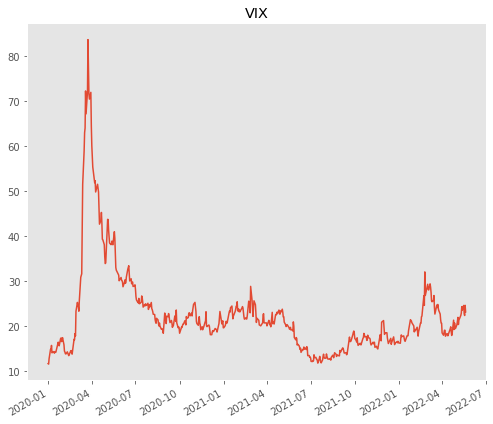

In [28]:
vix['VIX'].plot(figsize=(7,6))
plt.title('VIX')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")


plt.savefig(plot_output_dir+"\\vix.png", dpi=150, bbox_inches='tight')



In [32]:
vix.round(2).head(7)

,VIX
2022-05-20,23.10
2022-05-19,24.56
2022-05-18,22.30
2022-05-17,22.74
2022-05-16,24.53
2022-05-13,23.48
2022-05-12,24.26


In [33]:
vix.to_csv(data_output_dir+"\\vix.csv")
vix.to_csv("vix.csv")

# wti

In [34]:
wti = concatter2(file_name="wti.csv", col1=15, col2=16, rename_from="PX_LAST.5", rename_to="WTI")

C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17124\218164143.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


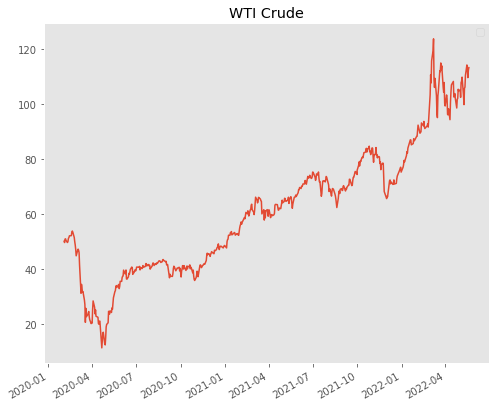

In [35]:
wti.plot(figsize=(7,6))
plt.title('WTI Crude')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.legend("")
plt.savefig(plot_output_dir+'\\WTI.png', dpi=350, bbox_inches='tight')

In [36]:
wti.to_csv(data_output_dir+"\\wti.csv")
wti.to_csv("wti.csv")


In [39]:
wti.head(7)



,WTI
Date,
2022-05-20,113.23
2022-05-19,112.21
2022-05-18,109.59
2022-05-17,112.40
2022-05-16,114.20
2022-05-13,110.49
2022-05-12,106.13


In [40]:
a= 109/105
a-1


0.03809523809523818

# usd inr

In [37]:
# import yfinance as yf

In [41]:
# nifty_comm = yf.download("^CNXCMDT", start='2020-01-01', end=dt.datetime.today())

In [42]:
# nifty_comm

In [41]:
usd_inr = concatter2(file_name="usdinr.csv", col1=12, col2=13, rename_from="PX_LAST.4", rename_to="USD INR")

In [42]:
usd_inr.round(2)

,USD INR
Date,
2022-05-20,77.55
2022-05-19,77.73
2022-05-18,77.58
2022-05-17,77.56
2022-05-13,77.44
...,...
2021-12-27,75.00
2021-12-28,74.66
2021-12-29,74.74


C:\Users\Advait Lath\AppData\Local\Temp\ipykernel_17124\2180202844.py:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False)


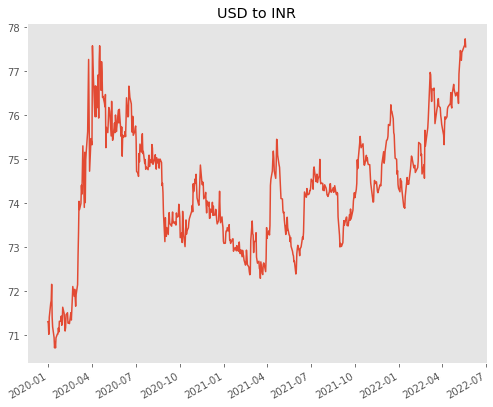

In [43]:
usd_inr['USD INR'].plot(figsize=(7,6), x_compat=True)
plt.title('USD to INR')
plt.grid(b=False)
plt.tight_layout()
plt.xlabel("")
plt.savefig(plot_output_dir+'\\usdinr.png', dpi=150, bbox_inches='tight')

In [53]:
usd_inr.to_csv("usdinr.csv")
usd_inr.to_csv(data_output_dir+"\\usdinr.csv")
